In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12)

In [2]:
air = pd.read_csv("data/airbnb.csv")
air.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [3]:
air.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

In [4]:
air.room_id.value_counts()
#this shows that there are no duplicates in the data

4524031     1
17331115    1
5568673     1
17187773    1
5464935     1
11166649    1
15219802    1
13738929    1
5837277     1
2856829     1
12338093    1
16599980    1
14259111    1
6929346     1
7510950     1
8651685     1
18103988    1
8739742     1
125848      1
4490133     1
2990993     1
8563600     1
5657487     1
11547646    1
5450688     1
14549957    1
18906790    1
11899879    1
9487357     1
7883772     1
           ..
3063405     1
15113833    1
261733      1
2054583     1
7249545     1
19148431    1
13260432    1
13399700    1
493274      1
9805529     1
9862869     1
13590225    1
10694351    1
8034777     1
14384837    1
1199811     1
7194306     1
1564353     1
3811006     1
16236221    1
18659004    1
7831221     1
13747890    1
18329263    1
15048361    1
685732      1
9799726     1
857752      1
1109655     1
16777216    1
Name: room_id, Length: 13232, dtype: int64

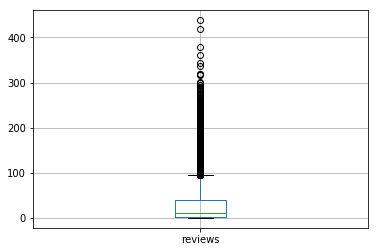

In [5]:
air.boxplot(column='reviews');

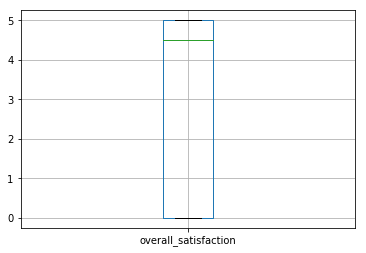

In [6]:
air.boxplot(column='overall_satisfaction');

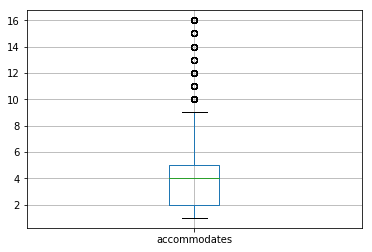

In [7]:
air.boxplot(column='accommodates');

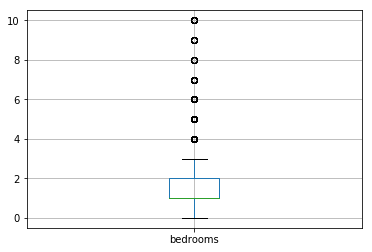

In [8]:
air.boxplot(column='bedrooms');

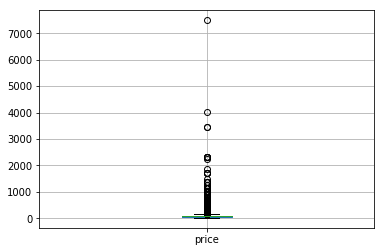

In [9]:
air.boxplot(column='price');

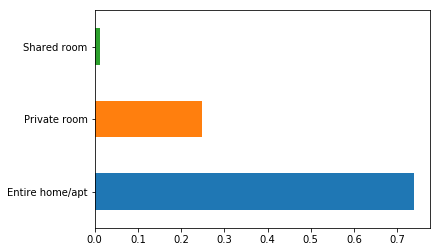

In [10]:
air.room_type.value_counts(normalize=True).plot.barh();

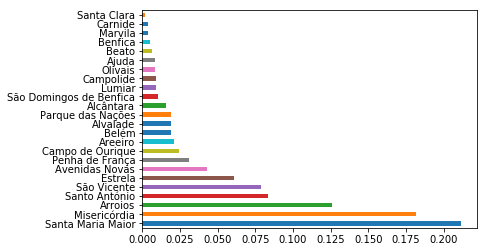

In [11]:
air.neighborhood.value_counts(normalize=True).plot.barh();

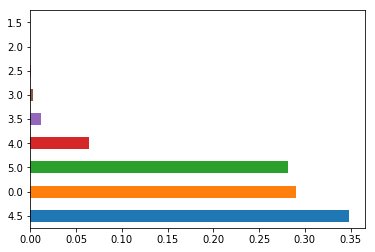

In [22]:
air.overall_satisfaction.value_counts(normalize=True).plot.barh();

In [15]:
air.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [58]:
air = air[(air.reviews > 0)]
air.shape

(10916, 9)

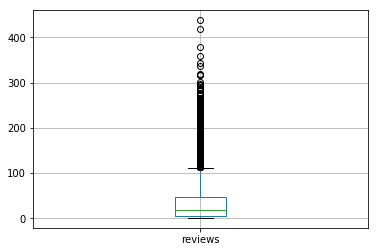

In [54]:
air.boxplot(column="reviews")

In [50]:
air.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0


In [59]:
highest = [(air.overall_satisfaction > 4)]
high = [(air.overall_satisfaction > 3) & (air.overall_satisfaction <= 4)]
middle = [(air.overall_satisfaction > 2) & (air.overall_satisfaction <= 3)]
low = [(air.overall_satisfaction > 1) & (air.overall_satisfaction <= 2)]
lowest = [(air.overall_satisfaction >= 0) & (air.overall_satisfaction <= 1)]

air.loc[air['overall_satisfaction'].isin(highest), 
             'rating_class_type'] = 'Highest Satisfaction'

air.loc[air['overall_satisfaction'].isin(high), 
             'rating_class_type'] = 'High Satisfaction'

air.loc[air['overall_satisfaction'].isin(middle), 
             'rating_class_type'] = 'Middle Satisfaction'

air.loc[air['overall_satisfaction'].isin(low), 
             'rating_class_type'] = 'Low Satisfaction'

air.loc[air['overall_satisfaction'].isin(lowest), 
             'rating_class_type'] = 'Lowest Satisfaction'

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [13]:
air.to_pickle("airbnb.pkl")

Conclusions:
    -Reviews, accommodates, bedrooms, and price all have outliers, but have not been removed because they seem realitic
    -2316 rooms didn't have reviews.  Rooms with reviews > 0 were copied into a new list (named airFull)